In [2]:
# データ加工・処理・分析ライブラリ
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機械学習ライブラリ
import sklearn

# 小数第3位まで表示
%precision 3

'%.3f'

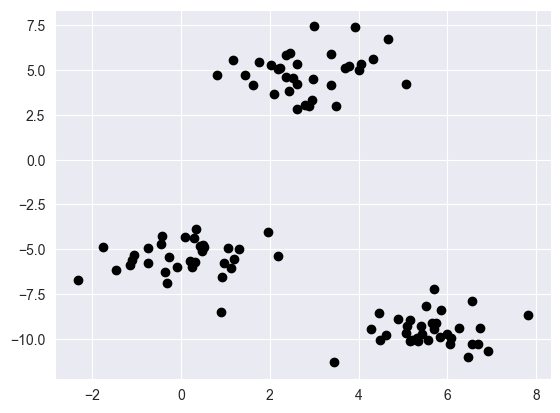

In [3]:
# k-means法を使うためのインポート
from sklearn.cluster import KMeans

# データ取得のためのインポート
from sklearn.datasets import make_blobs

# サンプルデータ生成
# 注意：make_blobsは2つの値を返すため、
# 一方は使用しない「_」で受け取る
X, _ = make_blobs(random_state=10)

# グラフを描画
# colorのオプションで色付けができる
plt.scatter(X[:,0], X[:,1], color='black')

In [4]:
# KMeansクラスの初期化
kmeans = KMeans(init='random', n_clusters=3)

# クラスターの重心を計算
kmeans.fit(X)

# クラスター番号を予測
y_pred = kmeans.predict(X)


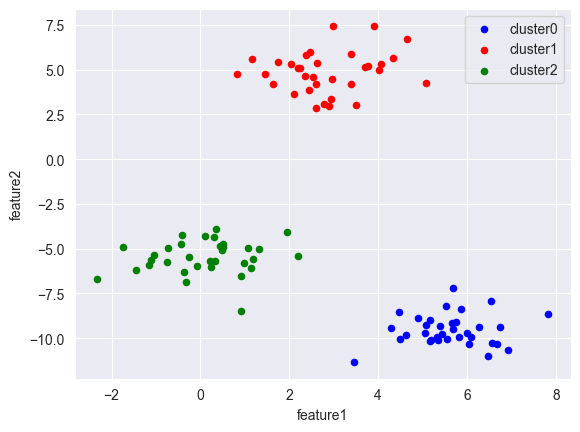

In [5]:
# concatでデータを横に結合（axis=1を指定）
merge_data = pd.concat([pd.DataFrame(X[:,0]), pd.DataFrame(X[:,1]), pd.DataFrame(y_pred)], axis=1)

# 上記のデータにて、X軸をfeature1、Y軸をfeature2、クラスタ番号をclusterと列名指定
merge_data.columns = ['feature1', 'feature2', 'cluster']

# クラスタリング結果のグラフ化
ax = None
colors = ['blue', 'red', 'green']
for i, data in merge_data.groupby('cluster'):
    ax = data.plot.scatter(x='feature1', y='feature2', color=colors[i],
                           label=f'cluster{i}', ax=ax)

In [6]:
import requests, zipfile

import io

# データがあるurlの指定
zip_file_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip'

# データを取得して展開する
r = requests.get(zip_file_url, stream=True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [12]:
# データの読み込み
bank = pd.read_csv('bank-full.csv', sep=';')
# データの先頭5行を表示
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [13]:
# サマリ統計量の表示
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [14]:
# ヘッダとデータ型の確認
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [15]:
print('データ形式(X,y):{}'.format(bank.shape))
print('欠損データの数:{}'.format(bank.isnull().sum().sum()))

データ形式(X,y):(45211, 17)
欠損データの数:0


In [16]:
from sklearn.preprocessing import StandardScaler

# データの列の絞り込み
bank_sub = bank[['age','balance','campaign','previous']]

# 標準化
sc = StandardScaler()
sc.fit(bank_sub)
bank_sub_std = sc.transform(bank_sub)
bank_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       45211 non-null  int64
 1   balance   45211 non-null  int64
 2   campaign  45211 non-null  int64
 3   previous  45211 non-null  int64
dtypes: int64(4)
memory usage: 1.4 MB


cluster_number
4    14454
0    23791
3     1286
2     3781
5      525
1     1374
Name: count, dtype: int64


Text(0, 0.5, 'count')

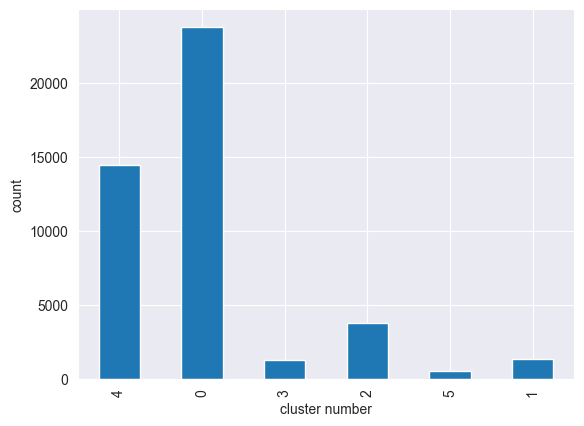

In [17]:
# 9-2-3-4
# KMeans クラスの初期化
kmeans = KMeans(init='random', n_clusters=6, random_state=0)

# クラスターの重心を計算
kmeans.fit(bank_sub_std)

# クラスター番号を pandas の Series オブジェクトに変換
labels = pd.Series(kmeans.labels_, name='cluster_number')

# クラスター番号と件数を表示
print(labels.value_counts(sort=False))

# グラフを描画
ax = labels.value_counts(sort=False).plot(kind='bar')
ax.set_xlabel('cluster number')
ax.set_ylabel('count')


Text(0, 0.5, 'Distortion')

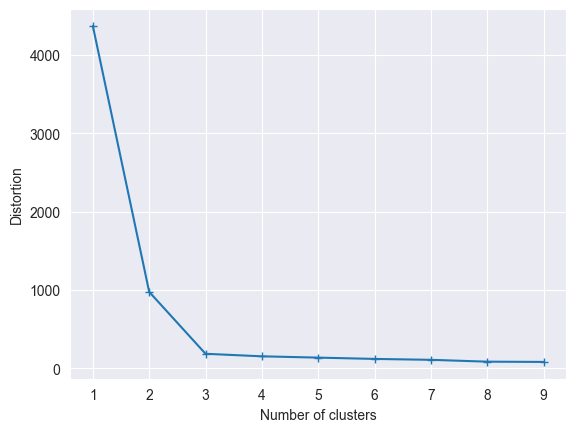

In [18]:
#9-2-4 エルボー法によるクラスタ数の推定
# エルボー方による推定。クラスター数を1から10に増やして、それぞれの距離の総和を求める
dist_list = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='random', random_state=0)
    kmeans.fit(X)
    dist_list.append(kmeans.inertia_)

# グラフを表示
plt.plot(range(1, 10), dist_list, marker='+')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')


Text(0, 0.5, 'Distortion')

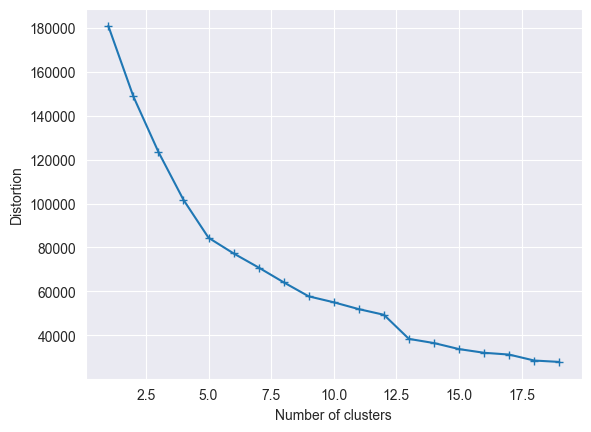

In [19]:
# エルボー方による推定。クラスター数を1から20に増やして、それぞれの距離の総和を求める
dist_list = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='random', random_state=0)
    kmeans.fit(bank_sub_std)
    dist_list.append(kmeans.inertia_)

# グラフを表示
plt.plot(range(1, 20), dist_list, marker='+')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

Text(0, 0.5, 'Silhouette Score')

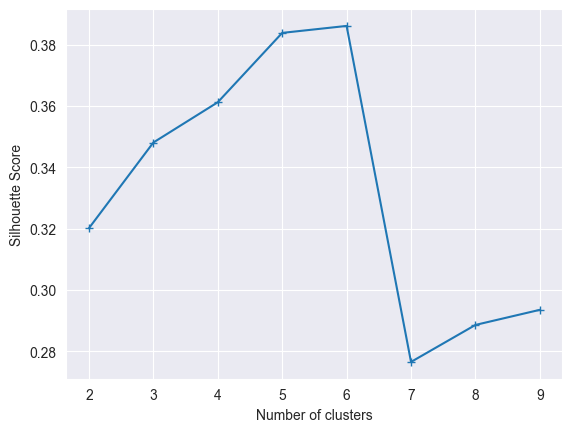

In [20]:
# シルエット法によるクラスタ数の推定
from sklearn.metrics import silhouette_score
# シルエット法による推定。クラスター数を2から10に増やして、それぞれのスコアを求める
silhouette_list = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, init='random', random_state=0)
    kmeans.fit(bank_sub_std)
    silhouette_list.append(silhouette_score(bank_sub_std, kmeans.labels_))
# グラフを表示
plt.plot(range(2, 10), silhouette_list, marker='+')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

In [21]:
# 金融機関のデータにクラスター番号のデータを結合
bank_with_cluster = pd.concat([bank, labels], axis=1)

# 先頭の5行を表示
bank_with_cluster.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,cluster_number
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,4
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,4
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,4
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0


In [22]:
# 分割のための区切りを設定
bins = [15,20,25,30,35,40,45,50,55,60,65,100]

# 上の区切りをもとに金融機関のデータを分割し、qcut_age変数に各データの年齢層を設定
qcut_age = pd.cut(bank_with_cluster.age, bins, right=False)

# クラスター番号と年齢層を結合
df = pd.concat([bank_with_cluster.cluster_number, qcut_age], axis=1)

# クラスター番号と年齢層を軸に集計し、年齢層を列に設定
cross_cluster_age = df.groupby(['cluster_number', 'age']).size().unstack().fillna(0)
cross_cluster_age


/var/folders/zt/k_5y_7596w56m6k0h09ycxtw0000gn/T/ipykernel_39809/1563227460.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cross_cluster_age = df.groupby(['cluster_number', 'age']).size().unstack().fillna(0)


age,"[15, 20)","[20, 25)","[25, 30)","[30, 35)","[35, 40)","[40, 45)","[45, 50)","[50, 55)","[55, 60)","[60, 65)","[65, 100)"
cluster_number,,,,,,,,,,,
0,45,708,3972,8272,6853,3941,0,0,0,0,0
1,0,20,130,327,306,186,145,117,71,38,34
2,1,18,233,782,872,739,587,337,175,32,5
3,0,11,74,240,219,205,156,141,156,48,36
4,0,0,0,0,0,1022,4529,3840,3479,850,734
5,1,5,55,119,99,92,53,53,41,6,1


<Axes: xlabel='age', ylabel='cluster_number'>

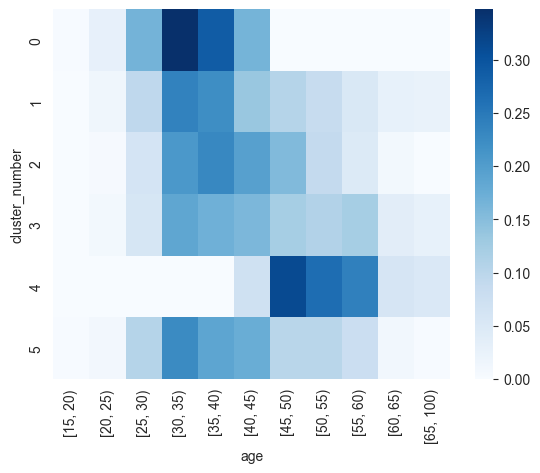

In [23]:
sns.heatmap(cross_cluster_age.apply(lambda x : x/x.sum(), axis=1), cmap='Blues')


In [24]:
cross_cluster_job = bank_with_cluster.groupby(['cluster_number', 'job']).size().unstack().fillna(0)
cross_cluster_job


job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
cluster_number,,,,,,,,,,,,
0,3022,5426,702,413,4980,55,826,2496,814,4290,690,77
1,193,239,42,21,335,53,42,113,53,245,33,5
2,387,845,146,108,863,60,144,358,40,704,90,36
3,109,176,54,36,418,77,71,69,22,194,49,11
4,1414,2915,530,655,2733,2008,477,1077,3,2054,434,154
5,46,131,13,7,129,11,19,41,6,110,7,5


<Axes: xlabel='job', ylabel='cluster_number'>

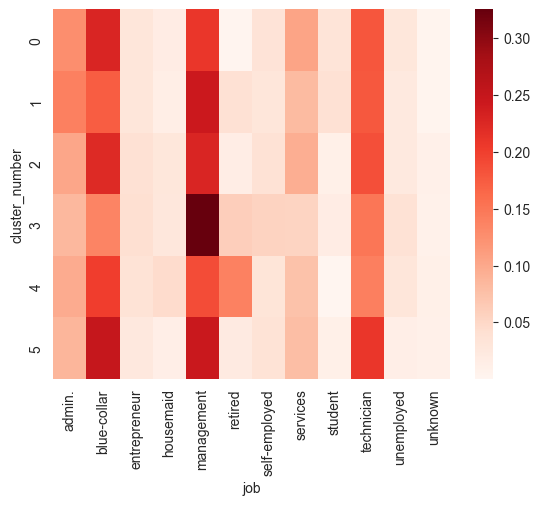

In [25]:
sns.heatmap(cross_cluster_job.apply(lambda x : x/x.sum(), axis=1), cmap='Reds')


相関係数:0.889


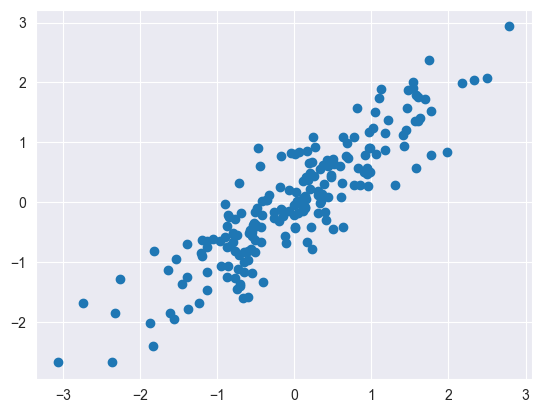

In [26]:
from sklearn.preprocessing import StandardScaler

# RandomStateオブジェクトを作成
sample = np.random.RandomState(1)

# 2つの乱数を生成
X = np.dot(sample.rand(2, 2), sample.randn(2, 200)).T

# 標準化
sc = StandardScaler()
X_std = sc.fit_transform(X)

# 相関係数の算出とグラフ化
print('相関係数:{:.3f}'.format(sp.stats.pearsonr(X_std[:, 0], X_std[:, 1])[0]))
plt.scatter(X_std[:, 0], X_std[:, 1])


In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_std)

PCA(n_components=2)

In [29]:
print(pca.components_)

[[ 0.707  0.707]
 [ 0.707 -0.707]]


In [30]:
print('各種成分の分数:{}'.format(pca.explained_variance_))

各種成分の分数:[1.899 0.111]


In [31]:
print('各種成分の分数の割合:{}'.format(pca.explained_variance_ratio_))

各種成分の分数の割合:[0.945 0.055]


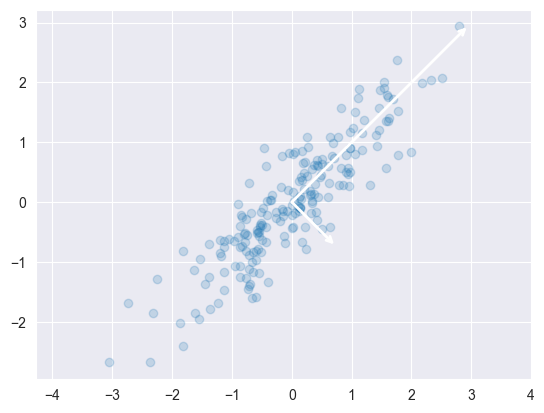

In [32]:
# パラメータ設定
arrowprops=dict(arrowstyle='->',
                linewidth=2,
                shrinkA=0, shrinkB=0)

# 矢印を描くための関数
def draw_vector(v0, v1):
    plt.gca().annotate('', v1, v0, arrowprops=arrowprops)

# 元のデータをプロット
plt.scatter(X_std[:, 0], X_std[:, 1], alpha=0.2)

# 主成分分析の2軸を矢印で表示する
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)

plt.axis('equal');


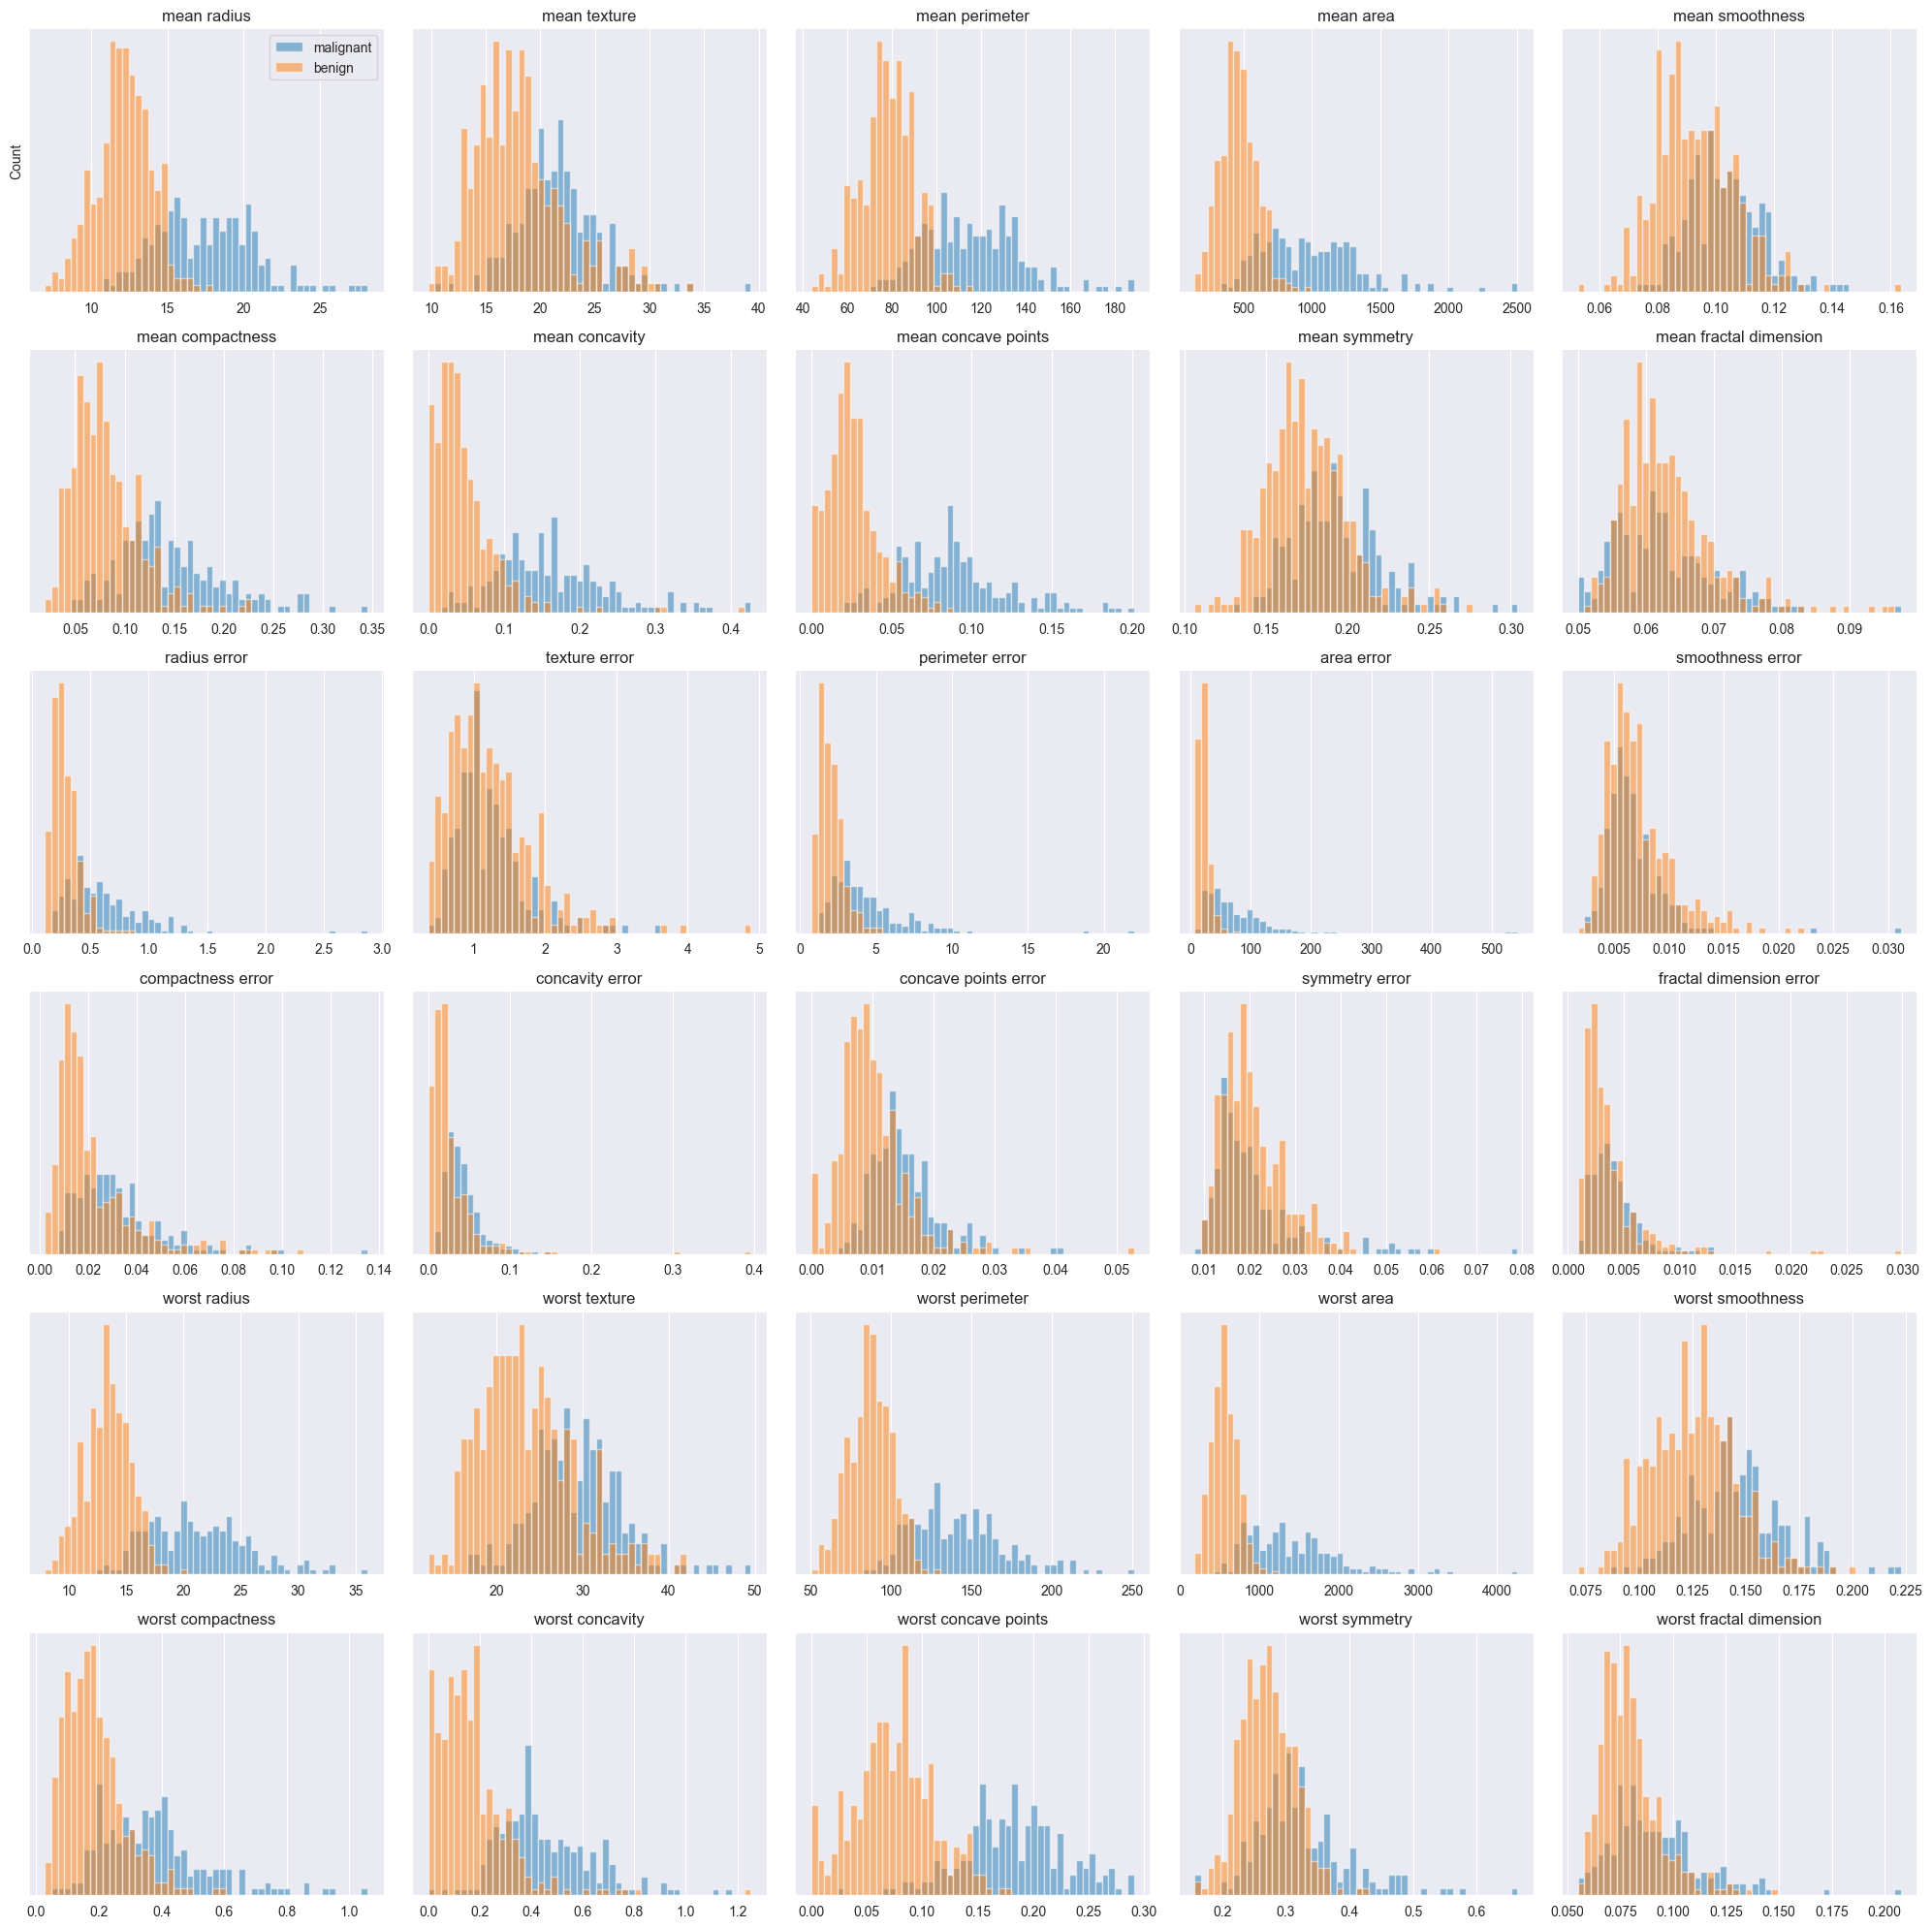

In [33]:
# 乳がんデータを読み込むためのインポート
from sklearn.datasets import load_breast_cancer

# 乳がんデータの取得
cancer = load_breast_cancer()

# データをmalignant（悪性）かbenign（良性）に分けるためのフィルター処理
# malignant（悪性）はcancer.targetが0
malignant = cancer.data[cancer.target==0]

# benign（良性）はcancer.targetが0
benign = cancer.data[cancer.target==1]

# malignant（悪性）がブルー、benign（良性）がオレンジのヒストグラム
# 各図は、各々の説明変数（mean radiusなど）と目的変数との関係を示したヒストグラム

fig, axes = plt.subplots(6,5, figsize=(20,20))
ax = axes.ravel()
for i in range(30):
    _, bins = np.histogram(cancer.data[:,i], bins=50)
    ax[i].hist(malignant[:,i], bins, alpha=.5)
    ax[i].hist(benign[:,i], bins, alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())

# ラベルの設定
ax[0].set_ylabel('Count')
ax[0].legend(['malignant','benign'], loc='best')
fig.tight_layout()

In [34]:
# 標準化
sc = StandardScaler()
X_std = sc.fit_transform(cancer.data)

# 主成分分析
pca = PCA(n_components=2)
pca.fit(X_std)
X_pca = pca.transform(X_std)

# 表示
print('X_pca shape:{}'.format(X_pca.shape))
print('Explained variance ratio:{}'.format(pca.explained_variance_ratio_))

X_pca shape:(569, 2)
Explained variance ratio:[0.443 0.19 ]


In [35]:
# 列にラベルをつける、1つ目が第1主成分、2つ目が第2主成分
X_pca = pd.DataFrame(X_pca, columns=['pc1','pc2'])

# 上のデータに、目的変数（cancer.target）を紐づける、横に結合
X_pca = pd.concat([X_pca, pd.DataFrame(cancer.target, columns=['target'])], axis=1)

# 悪性、良性を分ける
pca_malignant = X_pca[X_pca['target']==0]
pca_benign = X_pca[X_pca['target']==1]

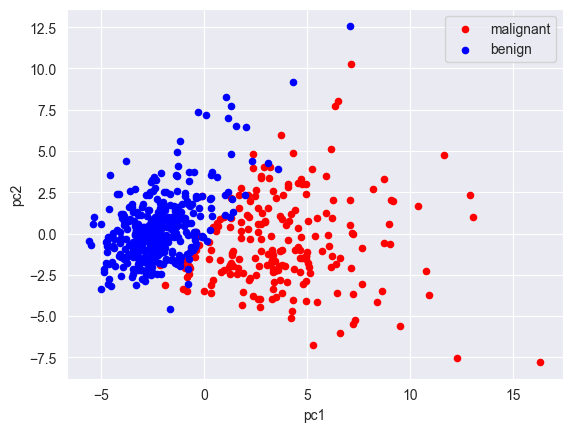

In [36]:
# 悪性をプロット
ax = pca_malignant.plot.scatter(x='pc1', y='pc2', color='red', label='malignant');

# 良性をプロット
pca_benign.plot.scatter(x='pc1', y='pc2', color='blue', label='benign', ax=ax);


In [41]:
trans = pd.read_excel('Online Retail.xlsx', sheet_name='Online Retail')
trans.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [43]:
trans['cancel_flg'] = trans.InvoiceNo.map(lambda x:str(x)[0])

trans.groupby('cancel_flg').size()

cancel_flg
5    532618
A         3
C      9288
dtype: int64

In [45]:
trans = trans[(trans.cancel_flg == '5') & (trans.CustomerID.notnull())]

In [48]:
trans['StockCode'].value_counts().head(5)

StockCode
85123A    2035
22423     1724
85099B    1618
84879     1408
47566     1397
Name: count, dtype: int64

In [49]:
# すべてのInvoiceNoをtrans_allとして抽出
trans_all = set(trans.InvoiceNo)

# 商品85123Aを購入したデータをtrans_aとする
trans_a = set(trans[trans['StockCode']=='85123A'].InvoiceNo)
print(len(trans_a))

# 商品85099Bを購入したデータをtrans_bとする
trans_b = set(trans[trans['StockCode']=='85099B'].InvoiceNo)
print(len(trans_b))

# 商品85123Aおよび85099Bを購入したデータをtrans_abとする
trans_ab = trans_a & trans_b
print(len(trans_ab))

1978
1600
252


In [50]:
# trans_ab の、両商品を含むバスケットの数を表示
print('両商品を含むバスケットの数:{}'.format(len(trans_ab)))
print('両商品を含むバスケットの全体に占める割合:{:.3f}'.format(len(trans_ab)/len(trans_all)))

両商品を含むバスケットの数:252
両商品を含むバスケットの全体に占める割合:0.014


In [51]:
print('確信度:{:.3f}'.format(len(trans_ab)/len(trans_a)))


確信度:0.127


In [52]:
print('確信度:{:.3f}'.format(len(trans_ab)/len(trans_b)))

確信度:0.158


In [53]:
# 全体のバスケットに占める商品Bの購買率を計算
support_b = len(trans_b) / len(trans_all)

# 商品Aを購入したときの商品Bの購買率を計算
confidence = len(trans_ab) / len(trans_a)`
# リフト値を計算
lift = confidence / support_b
print('lift:{:.3f}'.format(lift))


lift:1.476


In [55]:
# あやめのデータを読み込む
from sklearn.datasets import load_iris
iris = load_iris()
# データをDataFrameに変換
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


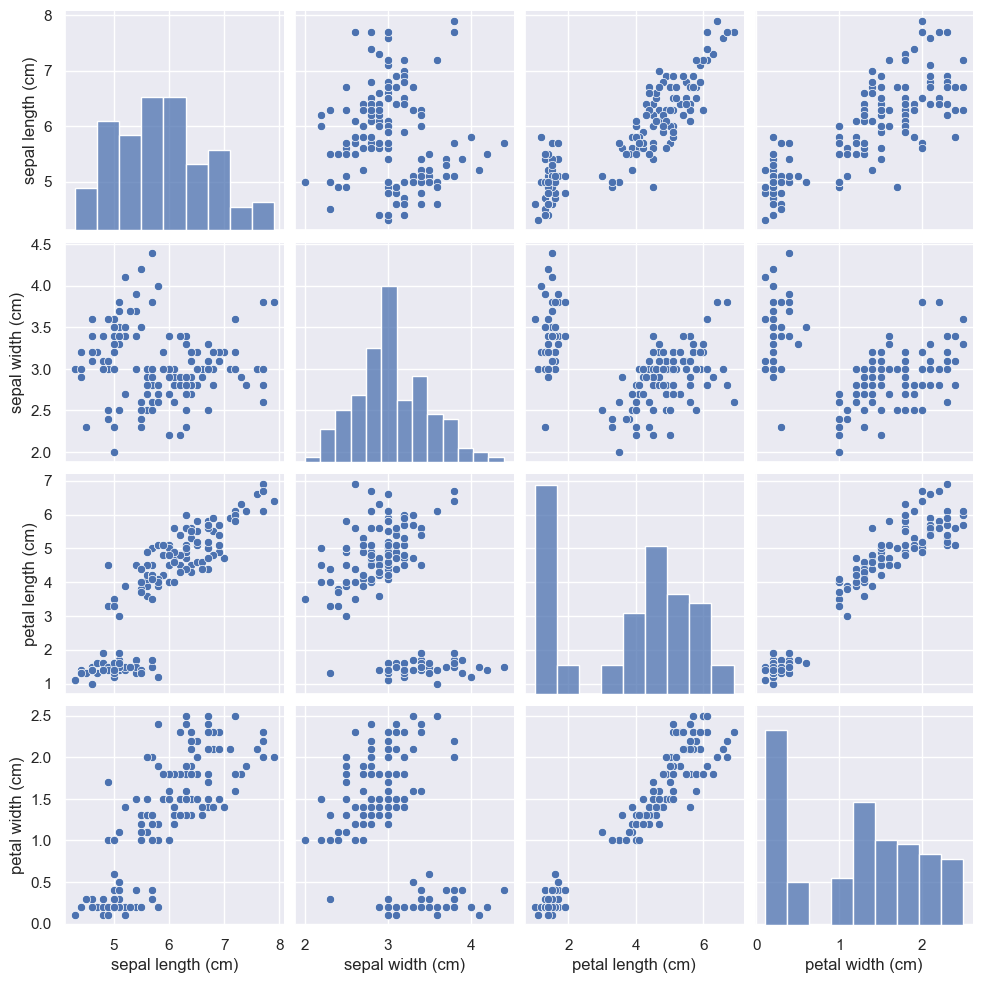

In [62]:
sns.pairplot(iris_df)

In [58]:
# 主成分分析の実行

pca = PCA(n_components=2)
pca.fit(iris_df)
X_pca = pca.transform(iris_df)
# 主成分分析の結果をDataFrameに変換
X_pca_df = pd.DataFrame(X_pca, columns=['pc1', 'pc2'])
# 目的変数をDataFrameに追加
X_pca_df['target'] = iris.target
X_pca_df.head()

,pc1,pc2,target
0,-2.684126,0.319397,0
1,-2.714142,-0.177001,0
2,-2.888991,-0.144949,0
3,-2.745343,-0.318299,0
4,-2.728717,0.326755,0


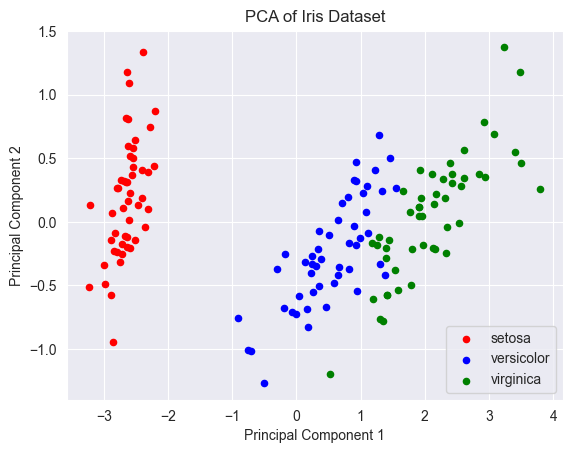

In [59]:
# グラフ化
ax = X_pca_df[X_pca_df['target']==0].plot.scatter(x='pc1', y='pc2', color='red', label='setosa');
X_pca_df[X_pca_df['target']==1].plot.scatter(x='pc1', y='pc2', color='blue', label='versicolor', ax=ax);
X_pca_df[X_pca_df['target']==2].plot.scatter(x='pc1', y='pc2', color='green', label='virginica', ax=ax);
# グラフのタイトルと軸ラベルを設定
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()